Chargement des données

In [4]:
import pandas as pd

# Charger les données à partir d'un fichier CSV (ajustez le chemin si nécessaire)
file_path = 'filtered_data.csv'
df = pd.read_csv(file_path)

# Afficher un aperçu des données
df.head()


,Country,Year,"Total Population, as of 1 January (thousands)","Rate of Natural Change (per 1,000 population)",Population Change (thousands),Population Growth Rate (percentage),Births (thousands),Births by women aged 15 to 19 (thousands),Total Fertility Rate (live births per woman),Mean Age Childbearing (years),...,"Female Mortality before Age 40 (deaths under age 40 per 1,000 female live births)","Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)","Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)"
0,Burundi,1950,2229.322,28.627,51.232,2.272,117.211,11.582,6.923,30.674,...,444.227,614.352,639.661,590.518,290.807,309.954,273.270,423.970,454.751,395.920
1,Burundi,1951,2280.554,27.581,50.384,2.185,118.043,11.668,6.914,30.674,...,439.498,610.436,636.943,585.391,288.479,308.601,270.021,421.038,453.082,391.799
2,Burundi,1952,2330.938,26.922,49.732,2.111,118.830,11.750,6.900,30.676,...,435.904,607.141,634.070,581.696,286.669,307.120,267.899,418.773,451.245,389.151
3,Burundi,1953,2380.670,26.593,49.033,2.039,120.089,11.887,6.915,30.677,...,432.679,603.648,630.348,578.471,284.712,304.927,266.165,416.309,448.483,387.006
4,Burundi,1954,2429.703,26.209,49.767,2.028,121.062,12.011,6.917,30.679,...,429.470,600.680,627.641,575.264,283.199,303.610,264.461,414.421,446.853,384.896


In [5]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

df.fillna(df.mean(), inplace=True)

# Vérifier s'il reste des valeurs manquantes
print("Valeurs manquantes après suppression :\n", df.isnull().sum())
df.head()
print("Nombre de lignes après suppression des valeurs manquantes :", len(df))

Valeurs manquantes par colonne :
 Country                                                                                           0
Year                                                                                              0
Total Population, as of 1 January (thousands)                                                     0
Rate of Natural Change (per 1,000 population)                                                     0
Population Change (thousands)                                                                     0
Population Growth Rate (percentage)                                                               0
Births (thousands)                                                                                0
Births by women aged 15 to 19 (thousands)                                                         0
Total Fertility Rate (live births per woman)                                                      0
Mean Age Childbearing (years)                                     

/tmp/ipykernel_6219/3440261525.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Statistiques descriptives

In [3]:
# Obtenir les statistiques descriptives pour toutes les colonnes numériques
stats = df.describe()
print("Statistiques descriptives :\n", stats)

# Calculer des statistiques supplémentaires si nécessaire
mean_values = df.mean()
median_values = df.median()
std_dev_values = df.std()

print("Moyennes des colonnes :\n", mean_values)
print("Médianes des colonnes :\n", median_values)
print("Écarts-types des colonnes :\n", std_dev_values)


Statistiques descriptives :
                Year  Total Population, as of 1 January (thousands)  \
count  17538.000000                                   1.753800e+04   
mean    1986.500000                                   2.137368e+04   
std       21.360618                                   9.515048e+04   
min     1950.000000                                   5.000000e-01   
25%     1968.000000                                   2.170327e+02   
50%     1986.500000                                   3.109365e+03   
75%     2005.000000                                   1.081445e+04   
max     2023.000000                                   1.431703e+06   

       Rate of Natural Change (per 1,000 population)  \
count                                   17538.000000   
mean                                       17.537752   
std                                        11.219175   
min                                      -105.925000   
25%                                         8.313750   
50% 

/tmp/ipykernel_17390/3478901992.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean()
/tmp/ipykernel_17390/3478901992.py:7: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = df.median()
/tmp/ipykernel_17390/3478901992.py:8: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
 

Évolution de la population au fil du temps

In [10]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Supposons que df est ton DataFrame avec les colonnes 'Year' et 'Total Population, as of 1 January (thousands)'
global_population = df.groupby('Year')['Total Population, as of 1 January (thousands)'].sum().reset_index()

# Créer la figure de base
fig = make_subplots(rows=1, cols=1)

# Ajouter les données comme points de taille variable (cercles)
trace = go.Scatter(
    x=global_population['Year'],
    y=global_population['Total Population, as of 1 January (thousands)'],
    mode='markers',
    marker=dict(
        size=global_population['Total Population, as of 1 January (thousands)'] / 50000,  # Ajuste la taille des cercles (facteur modifié)
        color=global_population['Total Population, as of 1 January (thousands)'],
        colorscale='Viridis',  # Choix des couleurs
        showscale=True
    ),
    name="Population mondiale"
)

fig.add_trace(trace)

# Mise en place de l'animation
frames = []

for year in global_population['Year']:
    frame = go.Frame(
        data=[go.Scatter(
            x=global_population[global_population['Year'] <= year]['Year'],
            y=global_population[global_population['Year'] <= year]['Total Population, as of 1 January (thousands)'],
            mode='markers',
            marker=dict(
                size=global_population[global_population['Year'] <= year]['Total Population, as of 1 January (thousands)'] / 50000,  # Augmenter la taille des cercles
                color=global_population[global_population['Year'] <= year]['Total Population, as of 1 January (thousands)'],
                colorscale='Viridis',
                showscale=True
            )
        )],
        name=f"Année {year}"
    )
    frames.append(frame)

fig.frames = frames

# Ajouter des boutons pour jouer l'animation
fig.update_layout(
    updatemenus=[dict(
        type="buttons",
        x=0.1,
        xanchor="right",
        y=0,
        yanchor="bottom",
        buttons=[dict(
            label="Play",
            method="animate",
            args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True, mode="immediate")]
        )]
    )],
    title="Animation de la Population Mondiale au Fil des Années",
    xaxis=dict(title='Année'),
    yaxis=dict(title='Population Totale (milliers)', range=[0, global_population['Total Population, as of 1 January (thousands)'].max() * 1.1]),
)

# Afficher le graphique
fig.show()


Taux de natalité et taux de mortalité au fil du temps

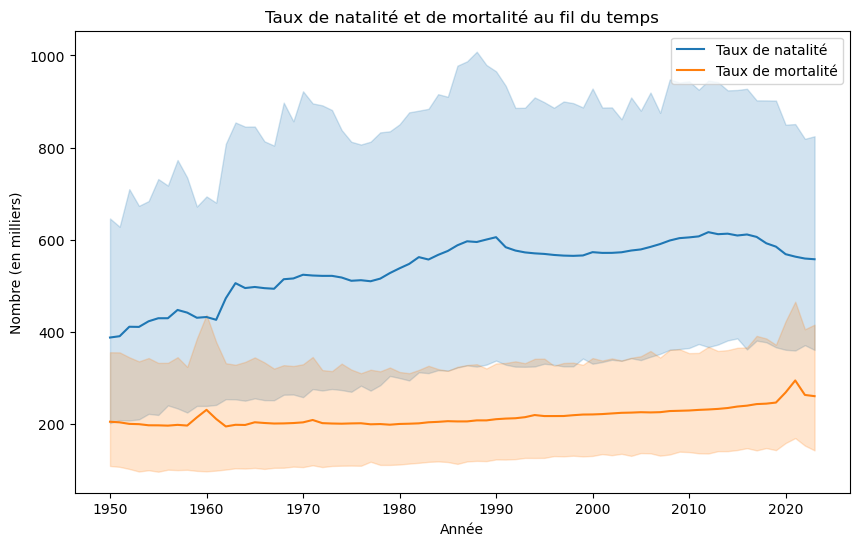

In [5]:
plt.figure(figsize=(10, 6))

# Taux de natalité
sns.lineplot(data=df, x='Year', y='Births (thousands)', label='Taux de natalité')
# Taux de mortalité
sns.lineplot(data=df, x='Year', y='Total Deaths (thousands)', label='Taux de mortalité')

plt.title("Taux de natalité et de mortalité au fil du temps")
plt.xlabel("Année")
plt.ylabel("Nombre (en milliers)")
plt.legend()
plt.show()


Matrice de Corrélation

/tmp/ipykernel_6219/1896621853.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


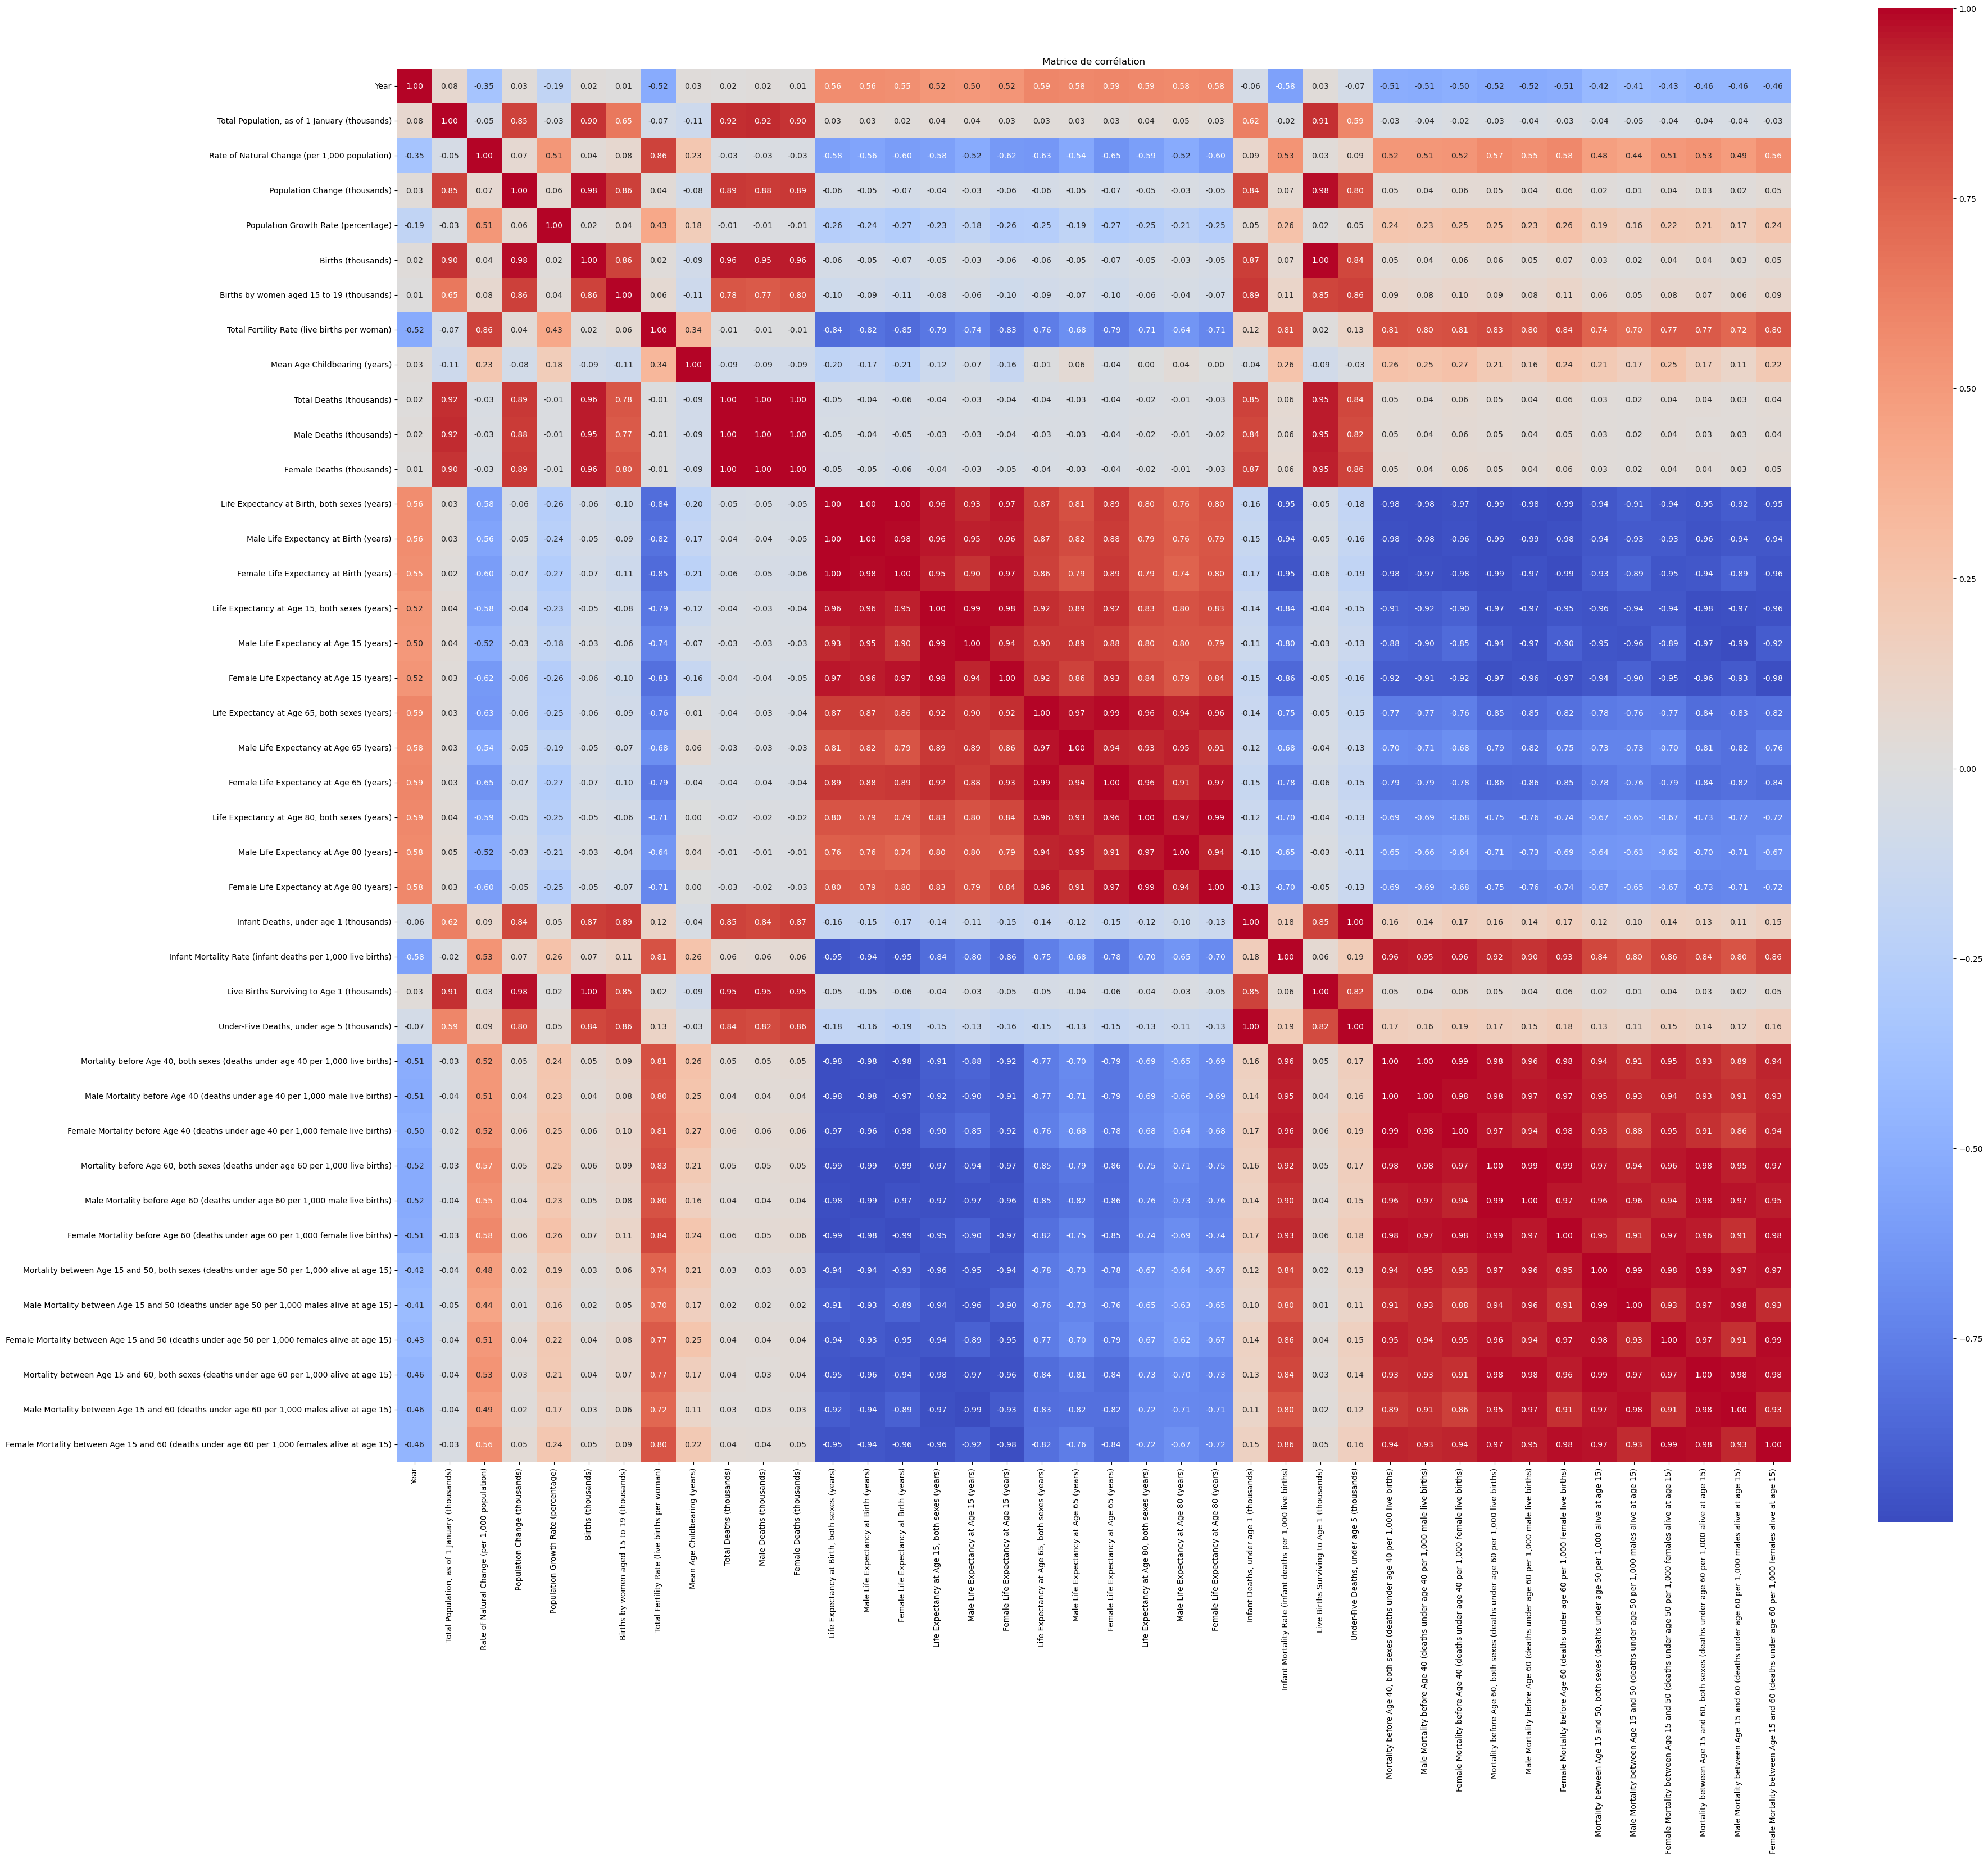

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(40, 35))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation")
plt.show()

PCA

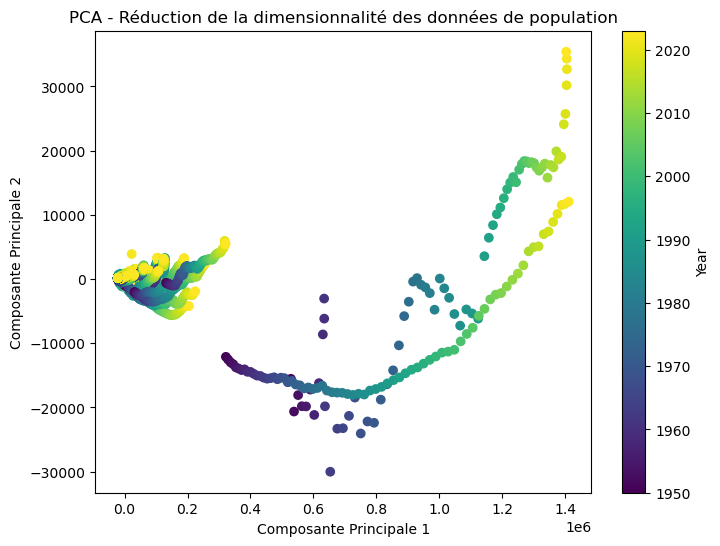

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
pca = PCA(n_components=2)
encoder = LabelEncoder()
df['Country'] = encoder.fit_transform(df['Country'])
pca_result = pca.fit_transform(df)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Year'], cmap='viridis')
plt.colorbar(label='Year')
plt.title('PCA - Réduction de la dimensionnalité des données de population')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()

Distribution de l'espérance de vie

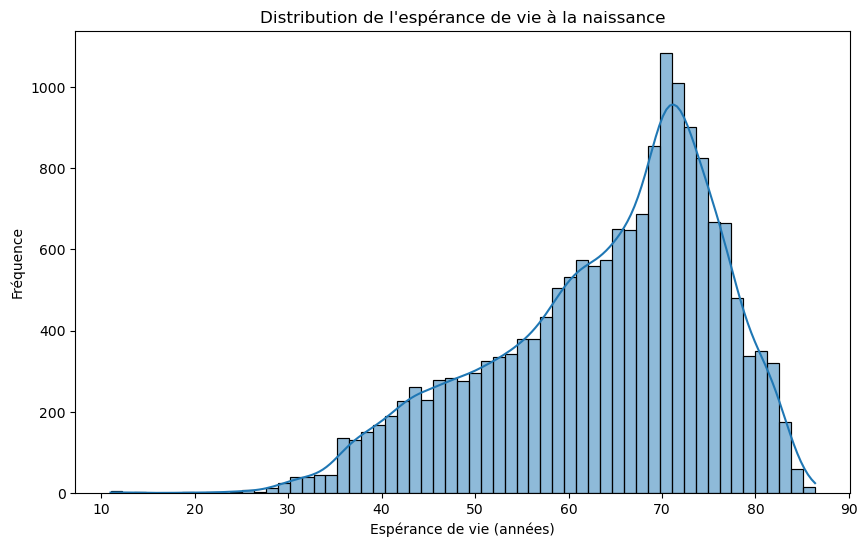

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Life Expectancy at Birth, both sexes (years)'], kde=True)
plt.title("Distribution de l'espérance de vie à la naissance")
plt.xlabel("Espérance de vie (années)")
plt.ylabel("Fréquence")
plt.show()


une distribution unimodale de l'espérance de vie à la naissance, avec une concentration élevée autour de 70 ans. Cela indique que la majorité de la population a une espérance de vie autour de cette valeur.
La distribution est asymétrique, légèrement étalée vers la gauche, ce qui suggère une minorité de personnes ayant une espérance de vie inférieure à la moyenne.

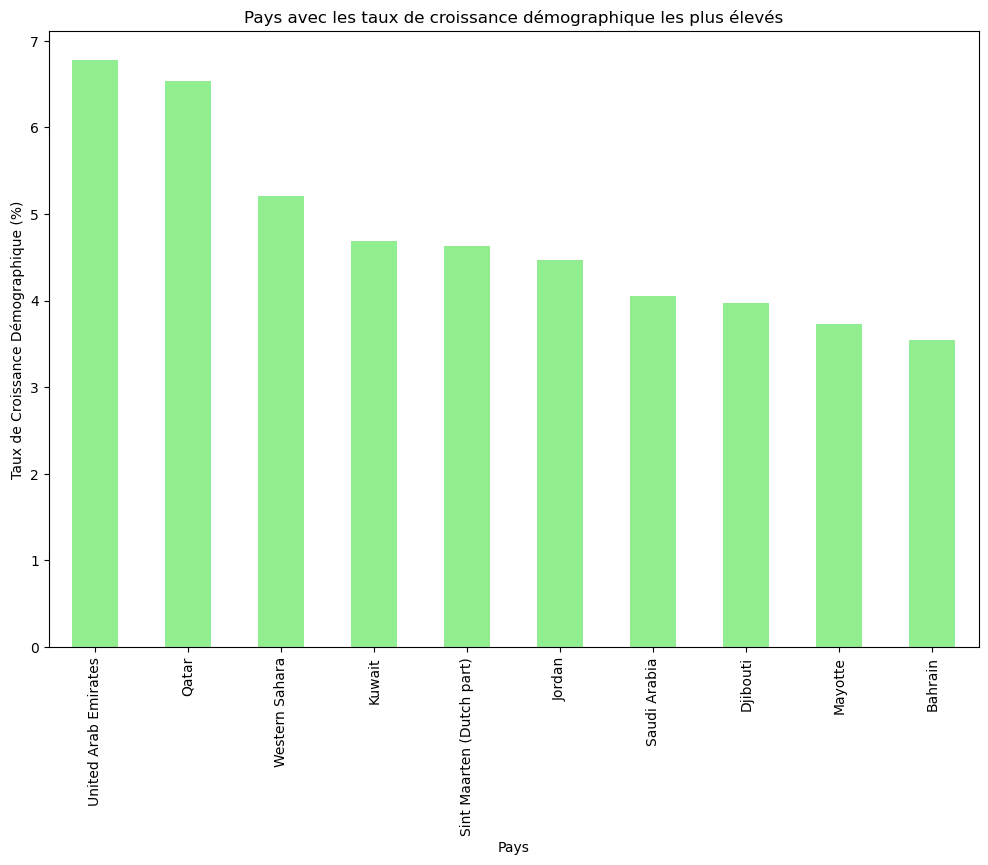

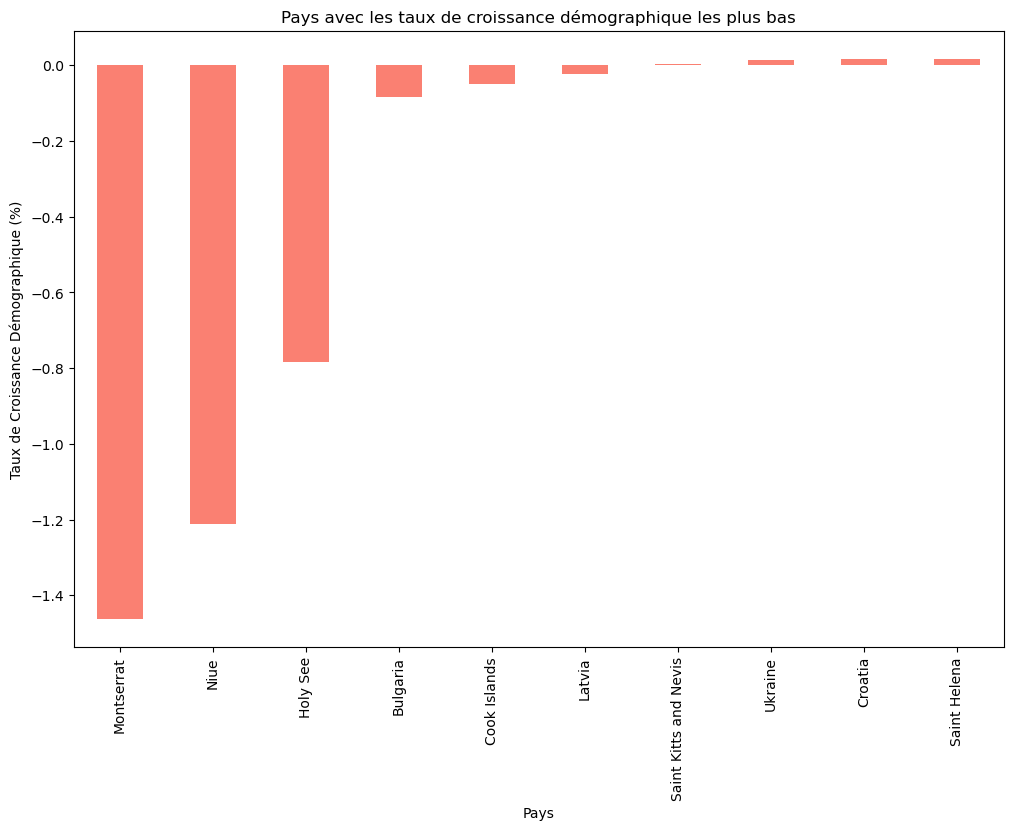

In [7]:
# Calcul du taux de croissance démographique pour chaque pays
growth_rate_by_country = df.groupby('Country')['Population Growth Rate (percentage)'].mean()

# Affichage des pays ayant les taux de croissance les plus élevés et les plus bas
growth_rate_by_country.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 8), color='lightgreen', title='Pays avec les taux de croissance démographique les plus élevés')
plt.xlabel('Pays')
plt.ylabel('Taux de Croissance Démographique (%)')
plt.show()

growth_rate_by_country.sort_values().head(10).plot(kind='bar', figsize=(12, 8), color='salmon', title='Pays avec les taux de croissance démographique les plus bas')
plt.xlabel('Pays')
plt.ylabel('Taux de Croissance Démographique (%)')
plt.show()


Analyse Tomporelle

In [8]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Supposons que df est ton DataFrame avec les colonnes 'Year' et 'Total Population, as of 1 January (thousands)'
global_population = df.groupby('Year')['Total Population, as of 1 January (thousands)'].sum().reset_index()

# Créer la figure de base
fig = make_subplots(rows=1, cols=1)

# Ajouter les données comme points de taille variable (cercles)
trace = go.Scatter(
    x=global_population['Year'],
    y=global_population['Total Population, as of 1 January (thousands)'],
    mode='markers',
    marker=dict(
        size=global_population['Total Population, as of 1 January (thousands)'] / 50000,  # Ajuste la taille des cercles (facteur modifié)
        color=global_population['Total Population, as of 1 January (thousands)'],
        colorscale='Viridis',  # Choix des couleurs
        showscale=True
    ),
    name="Population mondiale"
)

fig.add_trace(trace)

# Mise en place de l'animation
frames = []

for year in global_population['Year']:
    frame = go.Frame(
        data=[go.Scatter(
            x=global_population[global_population['Year'] <= year]['Year'],
            y=global_population[global_population['Year'] <= year]['Total Population, as of 1 January (thousands)'],
            mode='markers',
            marker=dict(
                size=global_population[global_population['Year'] <= year]['Total Population, as of 1 January (thousands)'] / 50000,  # Augmenter la taille des cercles
                color=global_population[global_population['Year'] <= year]['Total Population, as of 1 January (thousands)'],
                colorscale='Viridis',
                showscale=True
            )
        )],
        name=f"Année {year}"
    )
    frames.append(frame)

fig.frames = frames

# Ajouter des boutons pour jouer l'animation
fig.update_layout(
    updatemenus=[dict(
        type="buttons",
        x=0.1,
        xanchor="right",
        y=0,
        yanchor="bottom",
        buttons=[dict(
            label="Play",
            method="animate",
            args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True, mode="immediate")]
        )]
    )],
    title="Animation de la Population Mondiale au Fil des Années",
    xaxis=dict(title='Année'),
    yaxis=dict(title='Population Totale (milliers)', range=[0, global_population['Total Population, as of 1 January (thousands)'].max() * 1.1]),
)

# Afficher le graphique
fig.show()


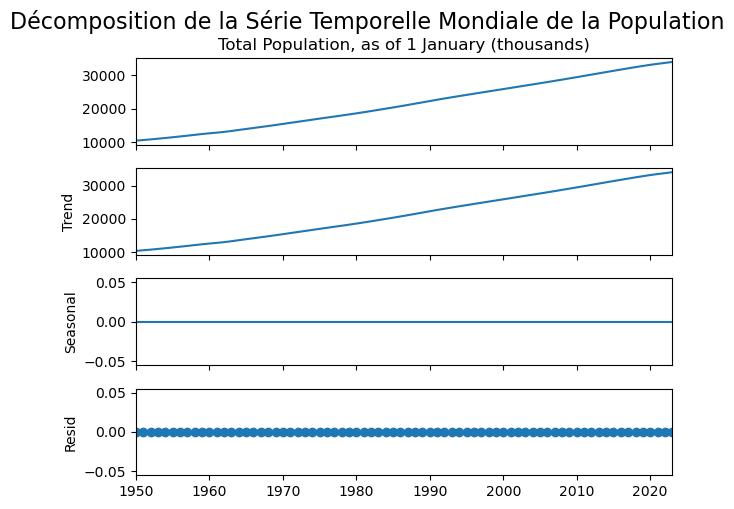

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Moyenne de la population mondiale par année
global_population = df.groupby('Year')['Total Population, as of 1 January (thousands)'].mean()

# Décomposition de la série temporelle globale
decomposition = seasonal_decompose(global_population, model='additive', period=1)

# Ajuster l'espacement du graphique
fig = decomposition.plot()
plt.subplots_adjust(top=0.95)  # Ajuste l'espacement pour éviter que le titre ne se chevauche avec l'axe

# Ajouter le titre en dehors de l'axe
plt.suptitle('Décomposition de la Série Temporelle Mondiale de la Population', fontsize=16, y=1.05)
plt.show()


<Figure size 1200x800 with 0 Axes>

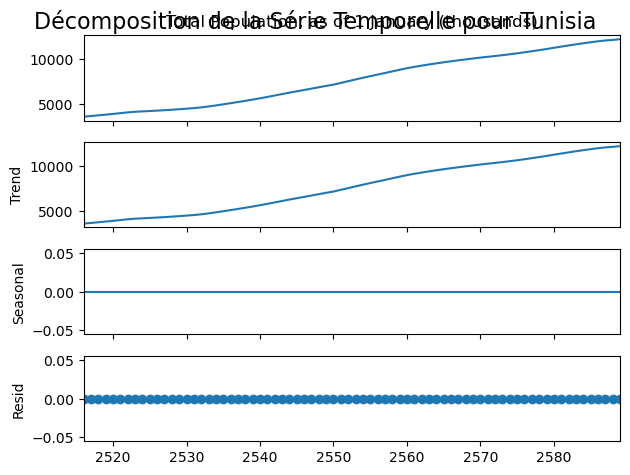

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Filtrer les données pour un pays spécifique, ici "Tunisia"
country = "Tunisia"
country_data = df[df['Country'] == country]

# Assurer que les données sont triées par année
country_data = country_data.sort_values('Year')

# Décomposition de la série temporelle de la population pour ce pays
decomposition = seasonal_decompose(country_data['Total Population, as of 1 January (thousands)'], model='additive', period=1)

# Tracer les résultats de la décomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle(f"Décomposition de la Série Temporelle pour {country}", fontsize=16)
plt.show()


<Figure size 1200x800 with 0 Axes>

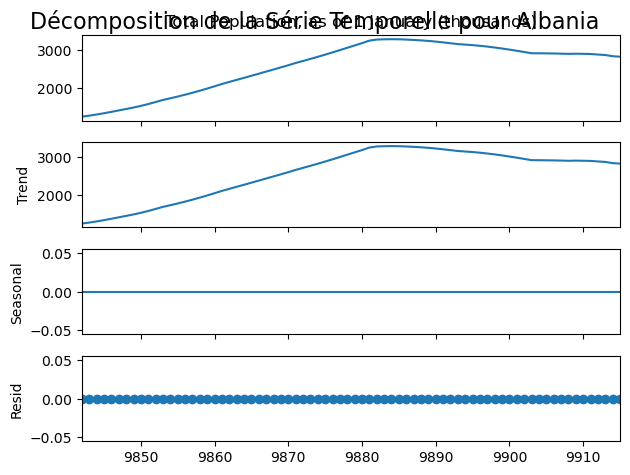

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Filtrer les données pour un pays spécifique, ici "Tunisia"
country = "Albania"
country_data = df[df['Country'] == country]

# Assurer que les données sont triées par année
country_data = country_data.sort_values('Year')

# Décomposition de la série temporelle de la population pour ce pays
decomposition = seasonal_decompose(country_data['Total Population, as of 1 January (thousands)'], model='additive', period=1)

# Tracer les résultats de la décomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle(f"Décomposition de la Série Temporelle pour {country}", fontsize=16)
plt.show()


<Figure size 1200x600 with 0 Axes>

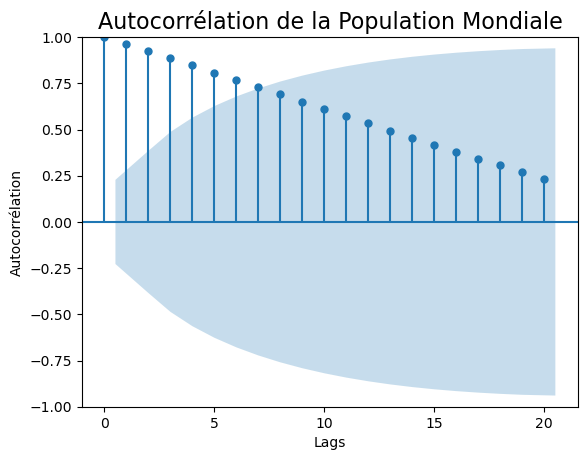

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Calcul de la moyenne de la population mondiale par année
global_population = df.groupby('Year')['Total Population, as of 1 January (thousands)'].mean()

# Tracer l'ACF pour la population mondiale
plt.figure(figsize=(12, 6))
plot_acf(global_population, lags=20)  # Calcul de l'ACF pour 20 lags (décalages)
plt.title('Autocorrélation de la Population Mondiale', fontsize=16)
plt.xlabel('Lags')
plt.ylabel('Autocorrélation')
plt.show()


In [11]:
import pandas as pd
import numpy as np
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans

# Étape 1 : Remplir les valeurs manquantes
df['Total Population, as of 1 January (thousands)'] = df.groupby('Country')['Total Population, as of 1 January (thousands)'].transform(lambda x: x.ffill())

# Étape 2 : S'assurer que tous les pays ont les mêmes années
common_years = df['Year'].unique()
df_all_years = df.set_index(['Country', 'Year']).reindex(
    pd.MultiIndex.from_product([df['Country'].unique(), common_years], names=['Country', 'Year'])
)

# Remplir les valeurs manquantes avec forward fill
df_all_years['Total Population, as of 1 January (thousands)'] = df_all_years.groupby('Country')['Total Population, as of 1 January (thousands)'].transform(lambda x: x.ffill())

# Étape 3 : Regrouper les séries temporelles par pays
time_series_data = df_all_years[['Total Population, as of 1 January (thousands)']].groupby('Country').apply(lambda x: x.values.flatten())

# Nettoyage des séries temporelles
# Supprimer les séries contenant uniquement des NaN ou de longueur nulle
time_series_data_cleaned = time_series_data[time_series_data.apply(lambda x: np.any(~np.isnan(x)) and len(x) > 0)]

# Transformer les séries en un format 3D (échantillons, séquences temporelles, caractéristiques)
time_series_data_3d = np.array([series.reshape(-1, 1) for series in time_series_data_cleaned])

# Étape 4 : Mise à l'échelle
scaler = TimeSeriesScalerMeanVariance(mu=0.0, std=1.0)  # Normalisation : moyenne = 0, écart-type = 1
time_series_data_scaled = scaler.fit_transform(time_series_data_3d)
from sklearn.cluster import DBSCAN
from tslearn.metrics import cdist_dtw
import numpy as np
import pandas as pd

# Étape 1 : Calculer la matrice de distance DTW
# La matrice doit être calculée entre toutes les séries temporelles
distance_matrix = cdist_dtw(time_series_data_scaled)

# Étape 2 : Appliquer DBSCAN
# Choisissez les paramètres `eps` (distance maximale) et `min_samples` (densité minimale)
dbscan = DBSCAN(eps=0.5, min_samples=2, metric="precomputed")  # 'precomputed' pour utiliser une matrice de distance
dbscan.fit(distance_matrix)

# Étape 3 : Récupérer les labels de cluster
y_pred = dbscan.labels_

# Étape 4 : Ajouter les clusters au DataFrame
clusters = pd.DataFrame({'Country': time_series_data_cleaned.index, 'Cluster': y_pred})
print(clusters)

# Étape 5 : Vérifier les clusters
print("Clusters détectés :")
print(clusters['Cluster'].value_counts())


                       Country  Cluster
0                  Afghanistan        0
1                      Albania        1
2                      Algeria        0
3               American Samoa        2
4                      Andorra        0
..                         ...      ...
232  Wallis and Futuna Islands       -1
233             Western Sahara        0
234                      Yemen        0
235                     Zambia        0
236                   Zimbabwe        0

[237 rows x 2 columns]
Clusters détectés :
 0    172
-1     47
 4      8
 1      2
 2      2
 3      2
 5      2
 6      2
Name: Cluster, dtype: int64


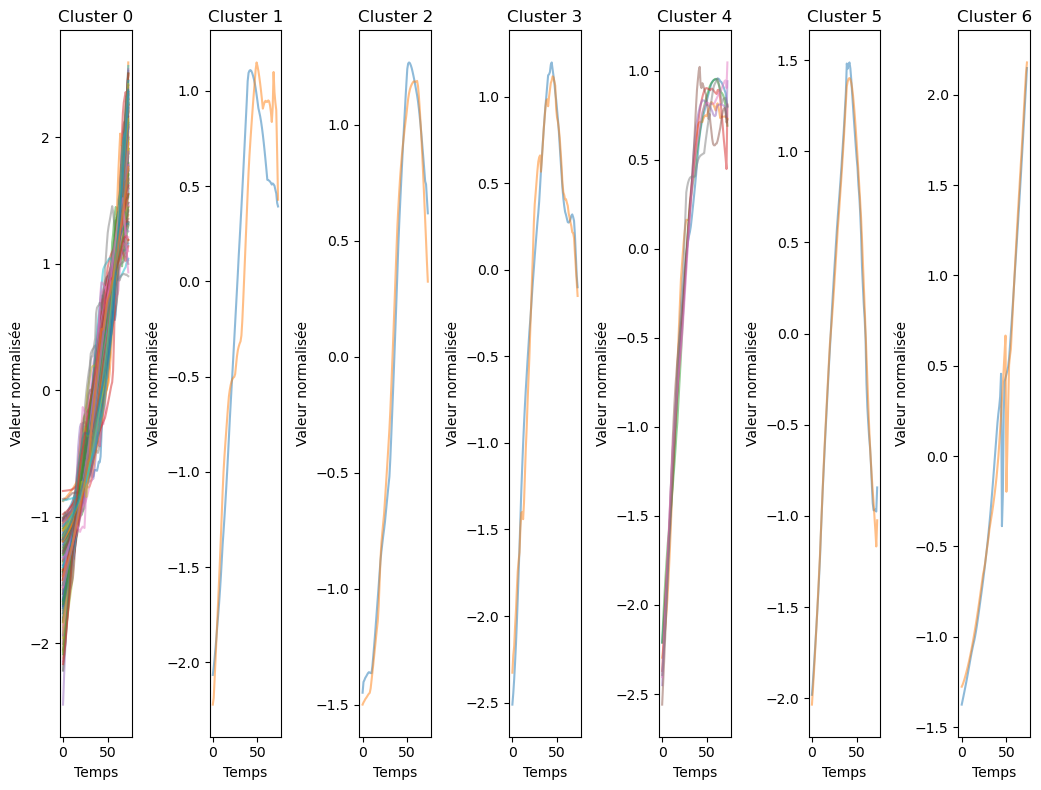

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for cluster in np.unique(y_pred):
    if cluster == -1:  # Cluster -1 représente le bruit
        continue
    plt.subplot(1, len(np.unique(y_pred)), cluster + 1)
    for series in time_series_data_scaled[y_pred == cluster]:
        plt.plot(series.ravel(), alpha=0.5)
    plt.title(f"Cluster {cluster}")
    plt.xlabel("Temps")
    plt.ylabel("Valeur normalisée")

plt.tight_layout()
plt.show()


In [13]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Exemple de données simulées
# Supposons que time_series_data_scaled contient des séries temporelles pour différents pays
# et y_pred est l'étiquette de cluster obtenue par DBSCAN

# Créer des séries temporelles simulées pour 3 clusters
time_series_data_scaled = np.random.rand(10, 100)  # 10 séries temporelles de 100 points
y_pred = np.random.choice([0, 1, 2], size=10)  # 3 clusters (0, 1, 2)

# Initialisation d'un graphique interactif
fig = go.Figure()

# Ajouter chaque série temporelle avec une couleur différente en fonction du cluster
for cluster in np.unique(y_pred):
    cluster_data = time_series_data_scaled[y_pred == cluster]
    for series in cluster_data:
        fig.add_trace(go.Scatter(x=np.arange(len(series)), y=series, mode='lines', name=f'Cluster {cluster}'))

# Mise en forme du graphique
fig.update_layout(
    title="Séries Temporelles Clustérisées",
    xaxis_title="Temps",
    yaxis_title="Valeur Normalisée",
    hovermode="closest"  # Afficher les valeurs au survol
)

# Afficher le graphique
fig.show()


In [20]:
from sklearn.metrics import silhouette_score
from tslearn.metrics import cdist_dtw

# Calculer la matrice de distance DTW
distance_matrix = cdist_dtw(time_series_data_scaled)

# Calculer le score de silhouette en utilisant la matrice de distance préalculée
silhouette_avg = silhouette_score(distance_matrix, y_pred, metric='precomputed')
print(f"Score de silhouette moyen : {silhouette_avg}")


Score de silhouette moyen : -0.008884730041030391


In [16]:
print("Cluster par pays :")
print(clusters)
# Étape 1 : Filtrer les pays appartenant au Cluster 0
cluster_0_countries = clusters[clusters['Cluster'] == 0]['Country']

# Étape 2 : Afficher les pays du Cluster 0
print("Pays appartenant au Cluster 0 :")
print(cluster_0_countries.tolist())
cluster_1_countries = clusters[clusters['Cluster'] == 1]['Country']

print("Pays appartenant au Cluster 1 :")
print(cluster_1_countries.tolist())
cluster_2_countries = clusters[clusters['Cluster'] == 2]['Country']

print("Pays appartenant au Cluster 2 :")
print(cluster_2_countries.tolist())

Cluster par pays :
                       Country  Cluster
0                  Afghanistan        0
1                      Albania        1
2                      Algeria        0
3               American Samoa        2
4                      Andorra        0
..                         ...      ...
232  Wallis and Futuna Islands       -1
233             Western Sahara        0
234                      Yemen        0
235                     Zambia        0
236                   Zimbabwe        0

[237 rows x 2 columns]
Pays appartenant au Cluster 0 :
['Afghanistan', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bonaire, Sint Eustatius and Saba', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Canada',

Pattern frequent

In [14]:
# Fonction pour catégoriser les taux de natalité
def categorize_birth_rate(rate):
    if rate < 10:
        return 'Faible'
    elif 10 <= rate < 20:
        return 'Moyenne'
    else:
        return 'Élevé'

# Fonction pour catégoriser l'espérance de vie
def categorize_life_expectancy(age):
    if age < 60:
        return 'Faible'
    elif 60 <= age < 80:
        return 'Moyenne'
    else:
        return 'Élevé'

# Application des fonctions de catégorisation
df['Catégorie Taux de natalité'] = df['Rate of Natural Change (per 1,000 population)'].apply(categorize_birth_rate)
df['Catégorie Espérance de vie'] = df['Life Expectancy at Birth, both sexes (years)'].apply(categorize_life_expectancy)


In [15]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Exemple de transformation des données en format approprié pour l'algorithme Apriori
# Nous allons utiliser 'Catégorie Taux de natalité' et 'Catégorie Espérance de vie' comme exemple

# Créer un tableau de transactions sous forme de listes (pour chaque pays)
transactions = []
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    transaction = []
    for index, row in country_data.iterrows():
        transaction.append(row['Catégorie Taux de natalité'])
        transaction.append(row['Catégorie Espérance de vie'])
    transactions.append(transaction)

# Conversion des transactions en format adapté
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

# Appliquer l'algorithme Apriori pour trouver des règles fréquentes
frequent_itemsets = apriori(df_transactions, min_support=0.05, use_colnames=True)

# Extraire les règles d'association
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Afficher les règles trouvées
print(rules)


       antecedents      consequents  antecedent support  consequent support  \
0        (Moyenne)         (Faible)            1.000000            0.995781   
1         (Faible)        (Moyenne)            0.995781            1.000000   
2        (Moyenne)          (Élevé)            1.000000            0.907173   
3          (Élevé)        (Moyenne)            0.907173            1.000000   
4  (Élevé, Faible)        (Moyenne)            0.902954            1.000000   
5        (Moyenne)  (Élevé, Faible)            1.000000            0.902954   

    support  confidence  lift  leverage  conviction  zhangs_metric  
0  0.995781    0.995781   1.0       0.0         1.0            0.0  
1  0.995781    1.000000   1.0       0.0         inf            0.0  
2  0.907173    0.907173   1.0       0.0         1.0            0.0  
3  0.907173    1.000000   1.0       0.0         inf            0.0  
4  0.902954    1.000000   1.0       0.0         inf            0.0  
5  0.902954    0.902954   1.0   